In [ ]:
#First all the necessary libraries are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:

url="https://raw.githubusercontent.com/mohammedAljadd/students-performance-prediction/refs/heads/main/student-data.csv"
df=pd.read_csv(url)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [ ]:
df.shape

(395, 31)

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
features=df[['failures','health','age','studytime']]
target=df['passed']

X=features.values #Independent variables
y=target.values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [ ]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

In [ ]:
scaler=StandardScaler() #to fix weight of multiple features and make it in same range
# normalizing values of x_train and x_test
X_train = scaler.fit_transform(X_train) #normalizing -->look for details
X_test=scaler.transform(X_test) #->>

In [ ]:
X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(X_test, dtype=torch.float32)

y_train=torch.tensor(y_train, dtype = int)
y_test=torch.tensor(y_test, dtype = int)

In [ ]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.linear1 = nn.Linear(4, 10)  # Input features (4) to hidden layer (10)
        self.linear2 = nn.Linear(10, 6)  # Hidden layer (10) to another hidden layer (6)
        self.linear3 = nn.Linear(6, 1)   # Hidden layer (6) to output (1 for binary classification)

    def forward(self, x):
        x1 = torch.relu(self.linear1(x))
        x2 = torch.relu(self.linear2(x1))
        x3 = self.linear3(x2)
        return x3

In [ ]:
loss = nn.BCEWithLogitsLoss()
model = BinaryClassifier()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
  # creating lists to store etst and train loss
train_loss=[]
test_loss=[]
num_epochs=1000

In [ ]:
# Training loop
for ep in range(num_epochs):
    model.train()
    predicted_y = model(X_train)
    losses = loss(predicted_y.squeeze(), y_train.float())  # Squeeze to remove extra dimensions for BCEWithLogitsLoss

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()

    if ep % 100 == 0:
        print(losses.item())

    train_loss.append(losses.item())

    # Testing loop
    model.eval()
    with torch.no_grad():
        predicted_test_y = model(X_test)
        loss_test = loss(predicted_test_y.squeeze(), y_test.float())
        test_loss.append(loss_test.item())

0.6450819969177246
0.6234874129295349
0.6177908182144165
0.6113900542259216
0.6041375994682312
0.5971671938896179
0.5907642245292664
0.5844655632972717
0.5789992213249207
0.5750598311424255


[[13 17]
 [ 2 47]]


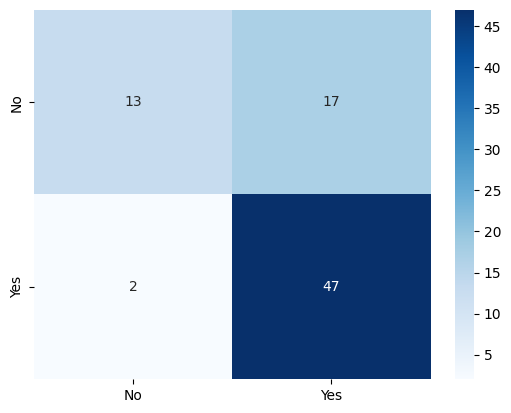

Accuracy: 75.9494%
Sample Predictions:
Predicted: No, Actual: No
Predicted: No, Actual: Yes
Predicted: Yes, Actual: No
Predicted: Yes, Actual: Yes
Predicted: Yes, Actual: Yes
Predicted: Yes, Actual: Yes
Predicted: Yes, Actual: Yes
Predicted: Yes, Actual: Yes
Predicted: Yes, Actual: Yes
Predicted: Yes, Actual: Yes


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
predicted_test_classes = torch.sigmoid(predicted_test_y).round().int()  # Applying sigmoid and rounding for binary class
cm = confusion_matrix(y_test, predicted_test_classes)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.show()

# Calculate accuracy
with torch.no_grad():
    outputs = model(X_test)
    predicted_classes = torch.sigmoid(outputs).round().int()  # Apply sigmoid and round

    accuracy = (predicted_classes.flatten() == y_test).sum().item() / y_test.size(0)

# Print accuracy and sample predictions
print(f"Accuracy: {accuracy*100:.4f}%")
print("Sample Predictions:")
for i in range(10):
    print(f"Predicted: {'Yes' if predicted_classes[i] == 1 else 'No'}, Actual: {'Yes' if y_test[i] == 1 else 'No'}")

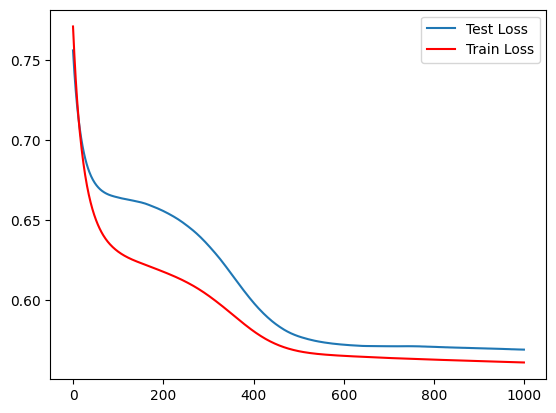

In [ ]:
plt.plot(test_loss, label = 'Test Loss')
plt.plot(train_loss, color='red', label = 'Train Loss')
plt.legend()
plt.show()